In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [2]:
# Euler integration timescale
tmin = -3000
tmax = 1000 # ms
dt = 10
steps = int((tmax - tmin)/dt) + 1
ts = np.arange(tmin, tmax + dt, dt)

omg = np.array([1, 2, 4, 8, 16], dtype='float64')

# synaptic weights
w1 = np.cos(2 * np.pi * omg * dt, dtype='float64')
w2 = np.sin(2 * np.pi * omg * dt, dtype='float64')
print(w1, w2)

[1. 1. 1. 1. 1.] [-2.44929360e-15 -4.89858720e-15 -9.79717439e-15 -1.95943488e-14
 -3.91886976e-14]


In [24]:
def show_response(y0, y1, y2):
    t = ts
    fig, ax = plt.subplots(2, 1)
    fig.set_size_inches(7, 5)
    fig.tight_layout()
    plt.rcParams.update({'font.size': 16})
    ax[0].plot(t, y0)
    ax[0].set_xlim([tmin, tmax])
    ax[0].set_title('Sensory Input')
    
    ax[1].plot(t, y1.sum(axis=0), label='Inference')
    ax[1].plot(t, y2.sum(axis=0), label='Prediction')
    ax[1].set_xlim([tmin, tmax])
    ax[1].set_title('Responses')
    ax[1].set_xlabel('Time (ms)')

In [4]:
def sim(ls, y0):
    y1 = np.array([np.cos(2 * w * np.pi * ts / 1000) / w for w in omg])
    y2 = np.array([np.sin(2 * w * np.pi * ts / 1000) / w for w in omg]) 
    
    for t in range(1, ts.shape[0]):
        l = ls[0] if t < 3000 / dt - 1 else ls[1]
        for i in range(5):
            for n in range(1):
                f = l * (y1[:, t].sum() - y0[t]) if not np.isnan(y0[t]) else 0 # feedforward
                p1 = (1 - l) * (y1[i, t] - w1[i] * y1[i, t-1] - w2[i] * y2[i, t-1]) # prior 1
                p2 = (1 - l) * (y2[i, t] - w2[i] * y1[i, t-1] + w1[i] * y2[i, t-1]) # prior 2
                y1[i, t] = y1[i, t] - 0.01 * (f + p1)
                y2[i, t] = y2[i, t] - 0.01 * p2

    return y1, y2

In [34]:
y0 = np.sum([np.cos(2 * w * np.pi * ts / 1000) / w for w in omg], axis=0)
y0[3000//dt:] = np.nan
ls = [0.1, 0.1]
y1, y2 = sim(ls, y0)

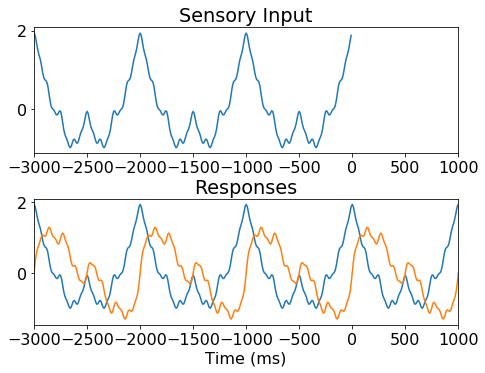

In [35]:
show_response(y0, y1, y2)

Text(53.375, 0.5, 'Response')

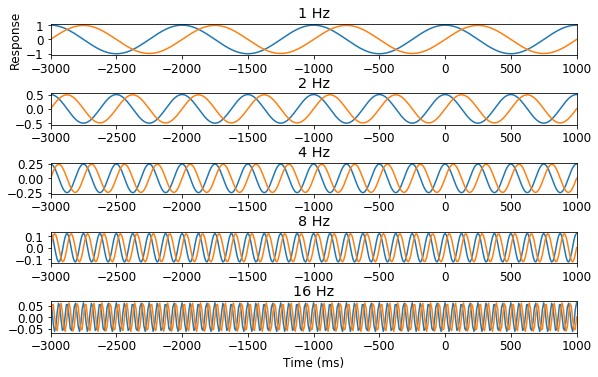

In [23]:
t = ts
fig, ax = plt.subplots(5, 1)
fig.set_size_inches(8, 5)
fig.tight_layout()
plt.rcParams.update({'font.size': 12})
for i in range(5):
    ax[i].plot(t, y1[i])
    ax[i].plot(t, y2[i])
    ax[i].set_xlim([tmin, tmax])
    ax[i].set_title('{} Hz'.format(2**i))
ax[4].set_xlabel('Time (ms)')
ax[0].set_ylabel('Response')